In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

In [40]:
df = pd.DataFrame(columns = ['Name', 'Country'])
print(df)
 

Empty DataFrame
Columns: [Name, Country]
Index: []


In [41]:
# Import Module
import os
  
# Folder Path
path = "C:\\Users\\tn2mi\\Deep Learning\\Learn\\DeploymentFastApi\\data\\names"
  
# Change the directory
os.chdir(path)
  
names=[]
country=[]
# Read text File
  
  
def read_text_file(file_path):
    with open(file_path, 'r',encoding="utf8") as f:
        #country.append(file_path.)
        names.append(f.read().split())
       # df['Name']=f.read().split()
        # df.add({'Name':f.read(),'Country':file_path})
        
  
#country.append('C:\\Users\\tn2mi\\Deep Learning\\Learn\\DeploymentFastApi\\data\\names\\Arabic.txt')
# iterate through all file
for file in os.listdir():
    #print(file[:len(file)-4])
    country.append(file[:len(file)-4])
    print(file[:len(file)-4])
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        #print(file_path)
        # call read text file function
        read_text_file(file_path)


Arabic
Chinese
Czech
Dutch
English
French
German
Greek
Irish
Italian
Japanese
Korean
Polish
Portuguese
Russian
Scottish
Spanish
Vietnamese


In [42]:
for i in names:
    print(names.index(i))

    country_name=country[names.index(i)]
    for j in i:
        new_row={'Name':j, 'Country':country_name}
        new_df = pd.DataFrame([new_row])

        df = pd.concat([df, new_df], ignore_index=True)

    
   


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [43]:
country[0]

'Arabic'

In [44]:
df.tail(100)

,Name,Country
20089,Varela,Spanish
20090,Vargas,Spanish
20091,Vásquez,Spanish
20092,Vázquez,Spanish
20093,Vega,Spanish
...,...,...
20184,Truong,Vietnamese
20185,Van,Vietnamese
20186,Vinh,Vietnamese
20187,Vuong,Vietnamese


In [45]:
df['Country'].unique()

array(['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French',
       'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean',
       'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish',
       'Vietnamese'], dtype=object)

In [46]:
class_names=['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French',
       'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean',
       'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish',
       'Vietnamese']

In [47]:
len(class_names)

18

In [48]:
df.groupby('Country')['Name'].size()


Country
Arabic        2000
Chinese        268
Czech          520
Dutch          298
English       3671
French         282
German         730
Greek          203
Irish          232
Italian        726
Japanese       991
Korean          94
Polish         139
Portuguese      75
Russian       9480
Scottish       100
Spanish        307
Vietnamese      73
Name: Name, dtype: int64

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Country'>

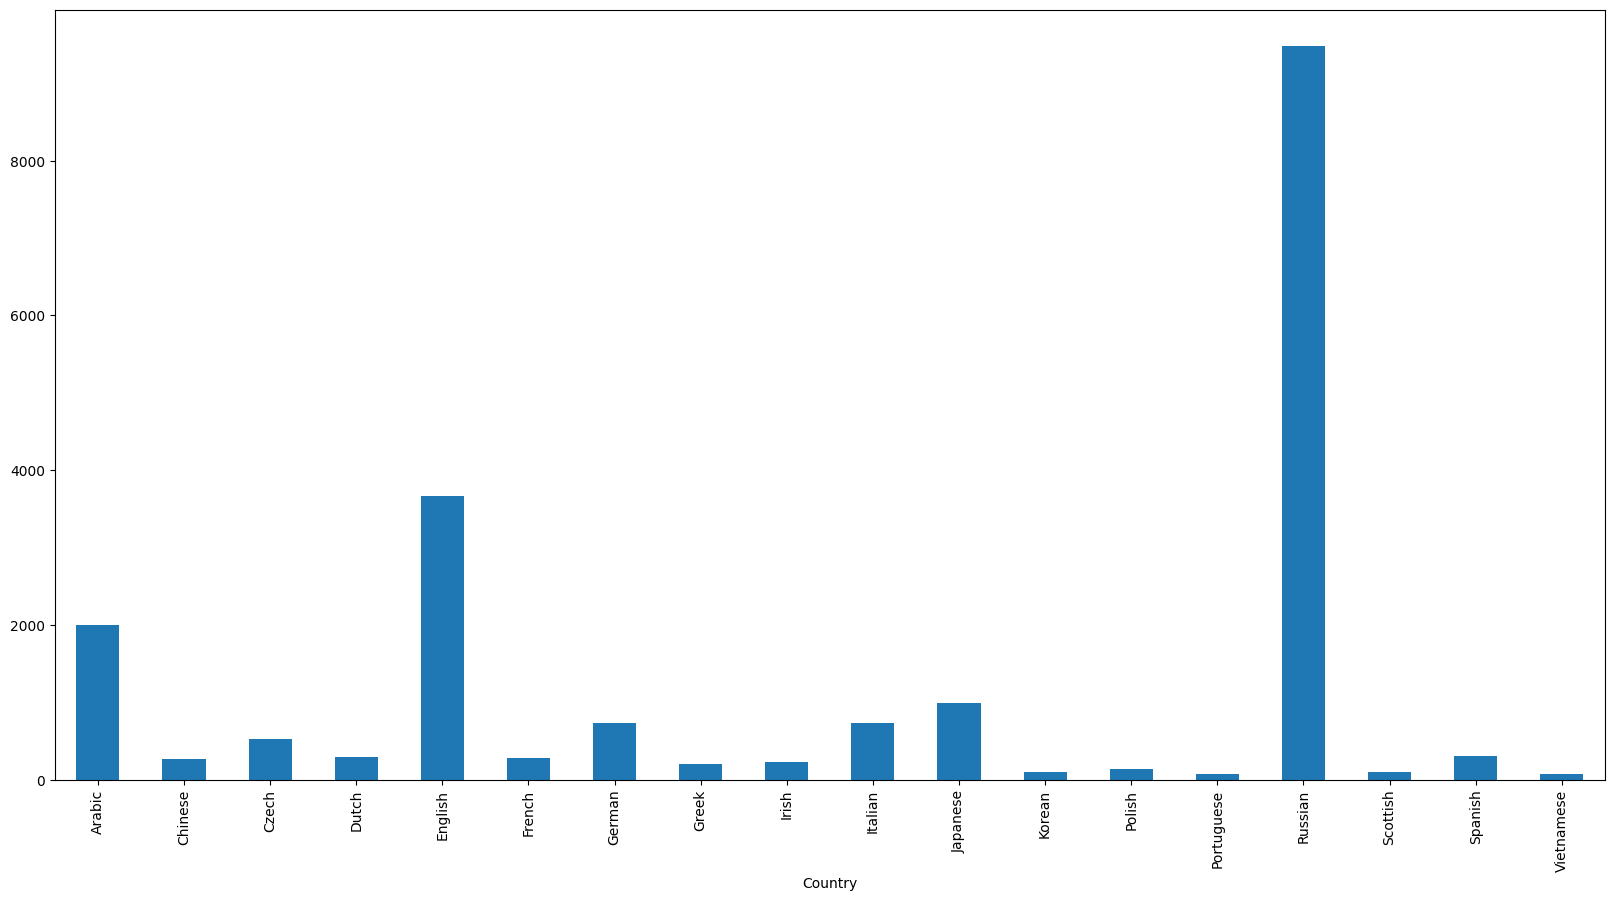

In [50]:
df.groupby('Country')['Name'].size().plot(kind='bar',figsize=(20,10))


In [51]:
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from yaspin import yaspin 

In [52]:
X = df['Name']
y= df['Country']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=53) 


In [81]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [22]:
vectorizer = TfidfVectorizer(min_df = 1,
                             max_df = 0.94,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

No. of feature_words:  16582


In [17]:
with yaspin(text="elapsed time", timer=True) as sp:
    classifier_linear = svm.SVC(kernel='linear', probability=True)
    t0 = time.time()
    classifier_linear.fit(train_vectors, y_train)
    t1 = time.time()
    prediction_linear = classifier_linear.predict(test_vectors)
    t2 = time.time()

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV


In [28]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10, 100]
}

# Create GridSearch object
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)

# Fit the model
grid_search.fit(train_vectors, y_train)

# Find the best parameters
best_params = grid_search.best_params_

# Create and fit a new model with best parameters
best_svm_model = svm.SVC(**best_params)
best_svm_model.fit(train_vectors, y_train)

SVC(C=10, gamma=0.1)

In [30]:
print(best_params)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [82]:
with yaspin(text="elapsed time", timer=True) as sp:
    classifier_linear = svm.SVC(kernel='rbf', C=10, gamma=0.1, probability=True)
    t0 = time.time()
    classifier_linear.fit(train_vectors, y_train)
    t1 = time.time()
    prediction_linear = classifier_linear.predict(test_vectors)
    t2 = time.time()

⠋ elapsed time (0:00:00.00)

In [24]:
classifier_linear.score(train_vectors,test_vectors)

ValueError: Found input variables with inconsistent numbers of samples: [1010, 19179]

In [83]:
time_linear_train = t1-t0 # The time needed to train our linear classifier
time_linear_predict = t2-t1 # The time needed to predict with our trained linear classifier

print("Training time: {:.2f}s; Prediction time: {:.2f}s".format(time_linear_train, time_linear_predict))

Training time: 89.85s; Prediction time: 2.86s


In [84]:
import random as rd


In [85]:
report = classification_report(y_test, prediction_linear, output_dict=True)

print('arabic precision: {:.2f}%'.format(report['Arabic']["precision"]*100))
print('french precision: {:.2f}%'.format(report['French']["precision"]*100))
print('german precision: {:.2f}%'.format(report['German']["precision"]*100))
print('english precision: {:.2f}%'.format(report['English']["precision"]*100))
print('dutch precision: {:.2f}%'.format(report['Dutch']["precision"]*100))
print('russian precision: {:.2f}%'.format(report['Russian']["precision"]*100))
print('korean precision: {:.2f}%'.format(report['Korean']["precision"]*100))
print('japanese precision: {:.2f}%'.format(report['Japanese']["precision"]*100))
print('polish precision: {:.2f}%'.format(report['Polish']["precision"]*100))
print('vietnamese precision: {:.2f}%'.format(report['Vietnamese']["precision"]*100))
print('spanish precision: {:.2f}%'.format(report['Spanish']["precision"]*100))
print('portuguese precision: {:.2f}%'.format(report['Portuguese']["precision"]*100))
print('scottish precision: {:.2f}%'.format(report['Scottish']["precision"]*100))
print('italian precision: {:.2f}%'.format(report['Italian']["precision"]*100))
print('irish precision: {:.2f}%'.format(report['Irish']["precision"]*100))
print('greek precision: {:.2f}%'.format(report['Greek']["precision"]*100))
print('chinese precision: {:.2f}%'.format(report['Chinese']["precision"]*100))
print('czech precision: {:.2f}%'.format(report['Czech']["precision"]*100))




print("\n")
print('arabic: ', report['Arabic'])
print('french: ', report['French'])
print('german: ', report['German'])
print('english: ', report['English'])
print('dutch: ', report['Dutch'])
print('russian: ', report['Russian'])
print('czech: ', report['Czech'])
print('chinese: ', report['Chinese'])
print('greek: ', report['Greek'])
print('irish: ', report['Irish'])
print('italian: ', report['Italian'])
print('scottish: ', report['Scottish'])
print('portuguese: ', report['Portuguese'])
print('spanish: ', report['Spanish'])
print('vietnamese: ', report['Vietnamese'])
print('polish: ', report['Polish'])
print('japanese: ', report['Japanese'])
print('korean: ', report['Korean'])

arabic precision: 97.17%
french precision: 40.00%
german precision: 59.49%
english precision: 74.35%
dutch precision: 76.32%
russian precision: 93.14%
korean precision: 31.25%
japanese precision: 84.51%
polish precision: 75.00%
vietnamese precision: 20.00%
spanish precision: 37.93%
portuguese precision: 12.50%
scottish precision: 0.00%
italian precision: 65.87%
irish precision: 60.00%
greek precision: 92.31%
chinese precision: 55.56%
czech precision: 53.33%


arabic:  {'precision': 0.9716981132075472, 'recall': 1.0, 'f1-score': 0.985645933014354, 'support': 309.0}
french:  {'precision': 0.4, 'recall': 0.24242424242424243, 'f1-score': 0.30188679245283023, 'support': 33.0}
german:  {'precision': 0.5949367088607594, 'recall': 0.4845360824742268, 'f1-score': 0.5340909090909092, 'support': 97.0}
english:  {'precision': 0.7435114503816794, 'recall': 0.8469565217391304, 'f1-score': 0.791869918699187, 'support': 575.0}
dutch:  {'precision': 0.7631578947368421, 'recall': 0.5087719298245614, 'f1

In [86]:
def predict_language(text):
    serie = pd.Series(text)
    vector = vectorizer.transform(serie)
    return classifier_linear.predict(vector)[0]

In [102]:
random_number = rd.randint(0, len(df)+1) # Picking a random sentence from the dataset
text = df.Name[random_number]
language = df.Country[random_number]

print(text)
print("\n -> LABELED LANGUAGE: " + language)
print("-> PREDICTED LANGUAGE: " + predict_language(text))

Currie

 -> LABELED LANGUAGE: English
-> PREDICTED LANGUAGE: English


In [109]:
import codecs
import seaborn as sns 
import re
import glob
import unidecode
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from tqdm import tqdm
from sklearn import svm
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
tqdm.pandas()



In [122]:
import pickle

pickle.dump(classifier_linear, open('C:\\Users\\tn2mi\\Deep Learning\\Learn\\Project\\NamePrediction\\BackEnd\\model\\SVM_model_language_identifier.pkl', 'wb')) # saving the model
with open('C:\\Users\\tn2mi\\Deep Learning\\Learn\\Project\\NamePrediction\\BackEnd\\model\\SVM_vectorizer.pk', 'wb') as fin: # saving the vectorizer
    pickle.dump(vectorizer, fin)


In [111]:
import pickle
import pandas as pd

SVM_model = pickle.load(open('C:\\Users\\tn2mi\\Deep Learning\\Learn\\Project\\NamePrediction\\BackEnd\\model\\SVM_model_language_identifier.pkl', 'rb'))
SVM_vectorizer = pickle.load(open("C:\\Users\\tn2mi\\Deep Learning\\Learn\\Project\\NamePrediction\\BackEnd\\model\\SVM_vectorizer.pk","rb"))


def predict_language(text):
    serie = pd.Series(text)
    vector = SVM_vectorizer.transform(serie)
    return str(SVM_model.predict(vector)[0])

In [121]:
text = "adam" 
print(predict_language(text))

English


python: can't open file 'c:\\Users\\tn2mi\\Deep Learning\\Learn\\DeploymentFastApi\\model\\language_identifier.py': [Errno 2] No such file or directory
